In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#note:
#in SQL there are tables with columns
#in python there are objects with properties

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
#note: session.query accomplishes both the SELECT and FROM  
session.query(func.max(Measurement.date)).first()

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement)
precip
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.read_sql(precip.statement, precip.session.bind)
precip_df.head(10)
# Sort the dataframe by date
precip_df.sort_values('date')

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
9007,9008,USC00518838,2010-01-01,0.21,72.0
9518,9519,USC00519523,2010-01-01,0.15,75.0
12187,12188,USC00519281,2010-01-01,0.15,70.0
14959,14960,USC00511918,2010-01-01,0.05,66.0
16938,16939,USC00516128,2010-01-01,0.14,73.0
2724,2725,USC00513117,2010-01-01,0.28,67.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
9519,9520,USC00519523,2010-01-02,0.00,75.0
2725,2726,USC00513117,2010-01-02,0.00,65.0


In [13]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()
df = pd.DataFrame(results)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [68]:
def get_vals_after_date(date):
    q = '''
    SELECT date, max(prcp), min(id) FROM measurement 
        WHERE date > '2016-08-23'
        GROUP BY date
        order by date
        limit 50;
    '''.format(date=date)
    df_from_q = pd.read_sql(q, engine)
    return df_from_q

df_from_func = get_vals_after_date('2016-01-23')
df_from_func.head()

,date,max(prcp),min(id)
0,2016-08-24,2.28,2365
1,2016-08-25,0.21,2366
2,2016-08-26,0.04,2367
3,2016-08-27,0.18,2368
4,2016-08-28,2.07,2369


In [15]:
#check dtype of date column
precip_df.date.dtype

#convert date column from object dtype to datetime64[ns]
precip_df['date'] = pd.to_datetime(precip_df['date'])
precip_df.dtypes

id                  int64
station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

In [16]:
df_from_func.dtypes

date          object
max(prcp)    float64
min(id)        int64
dtype: object

In [17]:
#convert date from object to datetime
df_from_func['date'] = pd.to_datetime(df_from_func['date'])
df_from_func.dtypes

date         datetime64[ns]
max(prcp)           float64
min(id)               int64
dtype: object

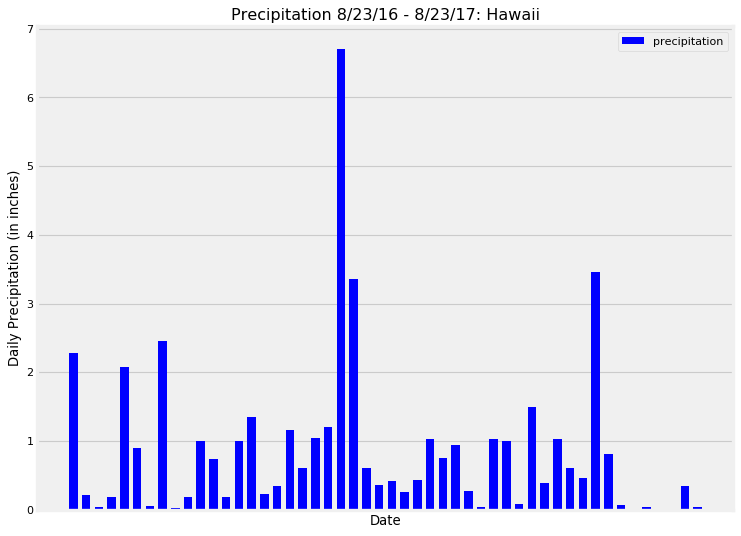

In [69]:
# Calculate the date 1 year ago from the last data point in the database
#last date in database = 2017-08-23...one year prior = 2016-08-23

#use boolean mask method to slice dataframe between 2 date ranges
# year_range = (precip_df['date'] >= '2016-08-23') & (precip_df['date'] <= '2017-08-23')
# #print(precip_df.loc[year_range])
# precip_data = precip_df.loc[year_range]





# Use Pandas Plotting with Matplotlib to plot the data

#plot
x = df_from_func['date']
y = df_from_func['max(prcp)']
width = 1/1.5
#increase figure size
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(x, y, width, color='blue')

#labels
plt.title("Precipitation 8/23/16 - 8/23/17: Hawaii")
plt.xlabel('Date')
plt.ylabel('Daily Precipitation (in inches)')


#clean up xticks(too many dates)
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

#add legend
plt.legend(['precipitation'])


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# count = precip_df.prcp.sum()
# mean = precip_df.prcp.mean()
# std = precip_df.prcp.std()
# min = precip_df.prcp.min()
# max = precip_df.prcp.max()
# quartiles = precip_df.prcp.quantile([0.25,0.5,0.75])
# # print(quartiles)

# def summary_data(count, mean, std, min, quartiles, max):
#     return pd.DataFrame({'':['count', 'mean', 'std', 'min', 'quartiles', 'max'], 
#                          'precipitation': [count, mean, std, min, quartiles, max]})
# summary_df = summary_data(count, mean, std, min, quartiles, max)
# summary_df

In [21]:
precip_df.prcp.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [37]:
precip_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [45]:
# Design a query to show how many stations are available in this dataset?

available_stations = '''
SELECT COUNT(DISTINCT station) FROM measurement 
'''
available_stations_df = pd.read_sql(available_stations, engine)


available_stations_df

,COUNT(DISTINCT station)
0,9


In [57]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
greatest_activity = '''
SELECT station, COUNT (*) AS 'active count'
FROM measurement
    GROUP BY station
    ORDER BY COUNT (*) DESC
'''
greatest_activity_df = pd.read_sql(greatest_activity, engine)
greatest_activity_df.head()

,station,active count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_detail = '''
SELECT station AS 'Most Active Station', MIN(tobs), MAX(tobs), AVG(tobs)
FROM measurement 
    WHERE station LIKE 'USC00519281'
'''
temp_detail_df = pd.read_sql(temp_detail, engine)
temp_detail_df


,Most Active Station,MIN(tobs),MAX(tobs),AVG(tobs)
0,USC00519281,54.0,85.0,71.663781


Text(0,0.5,'Frequency')

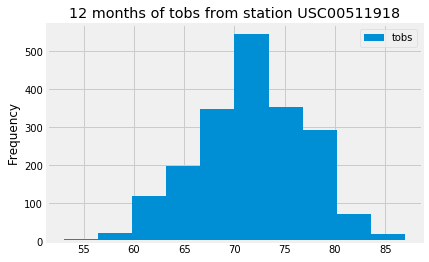

In [84]:
# Choose the station with the highest number of temperature observations.
max_tobs_station = '''
SELECT station, MAX(tobs)
FROM measurement
    GROUP BY station
    LIMIT 1
'''
max_tobs_station_df = pd.read_sql(max_tobs_station, engine)
# max_tobs_station_df


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_of_temps_station_usc00511918 = '''
SELECT *
FROM measurement
    WHERE station LIKE '%USC00511918%' AND date > 2016-08-23
'''
year_of_temps_station_usc00511918_df = pd.read_sql(year_of_temps_station_usc00511918, engine)

plt.hist(year_of_temps_station_usc00511918_df['tobs'], bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid',
          orientation='vertical', rwidth=None, log=False, color=None, label='Station USC00511918', stacked=False, normed=None,
         hold=None, data=None)
plt.legend(['tobs'])
plt.title('12 months of tobs from station USC00511918')
plt.ylabel('Frequency')

![precipitation](Images/station-histogram.png)

In [85]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [87]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-03-04', '2017-03-11'))

[(62.0, 70.48936170212765, 82.0)]


<BarContainer object of 1 artists>

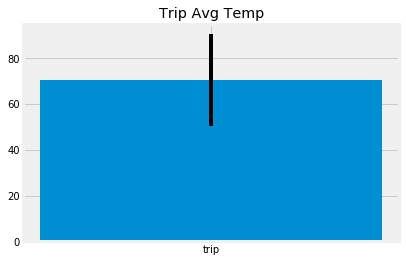

In [109]:
# Plot the results from your previous query as a bar chart. 
trip_temps = calc_temps('2017-03-04', '2017-03-11')
trip_df = pd.DataFrame(trip_temps, columns=['TMIN', 'TAVE', 'TMAX'])
trip_df

# Use "Trip Avg Temp" as your Title
plt.title('Trip Avg Temp')
# Use the average temperature for the y value
avg_temp = trip_df['TAVE']
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = trip_df.iloc[0]['TMAX'] - trip_df.iloc[0]['TMIN']

plt.bar(x='trip', height=avg_temp, yerr=yerr)

In [119]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


trip_rainfall_by_station = '''
SELECT station.station, SUM(prcp), name, latitude, longitude, elevation
FROM measurement
    JOIN station ON measurement.station = station.station
    WHERE date BETWEEN '2017-03-04' AND '2017-03-11'
    GROUP BY station.station
    ORDER BY SUM(prcp) DESC
'''
trip_rainfall_by_station_df = pd.read_sql(trip_rainfall_by_station, engine)
trip_rainfall_by_station_df.head()

,station,SUM(prcp),name,latitude,longitude,elevation
0,USC00513117,1.57,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
1,USC00519281,1.13,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00514830,0.63,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00516128,0.36,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,USC00519397,0.35,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


In [114]:
all = '''
SELECT *
FROM station
'''
all_df = pd.read_sql(all, engine)
all_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [34]:
# Plot the daily normals as an area plot with `stacked=False`
